In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
unseen_data = pd.read_csv('SpamAssasin.csv')

In [28]:
unseen_data.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [29]:
unseen_data.shape

(5809, 7)

In [30]:
df = unseen_data.copy()
df.isna().sum()

sender        0
receiver    210
date          0
subject      16
body          1
label         0
urls          0
dtype: int64

In [31]:
df = df.dropna()
df.isna().sum()

sender      0
receiver    0
date        0
subject     0
body        0
label       0
urls        0
dtype: int64

In [32]:
df.shape

(5582, 7)

In [33]:
label_counts = df['label'].value_counts()
print(label_counts)

label
0    3924
1    1658
Name: count, dtype: int64


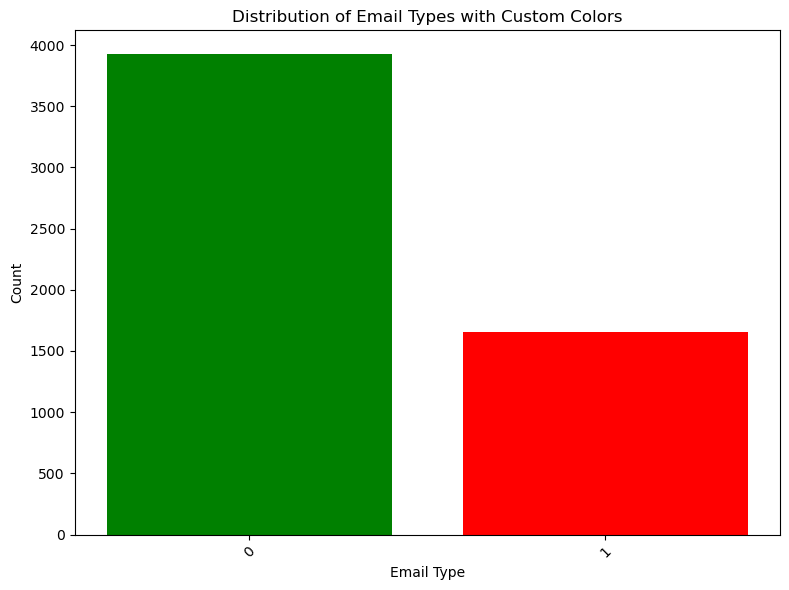

In [34]:
import matplotlib.pyplot as plt


# Ensure the index is of string type for matching
unique_label = label_counts.index.astype(str).tolist()

# Update color_map to use integers if your labels are integers
color_map = {
    '1': 'red',   # Assuming '1' is phishing
    '0': 'green', # Assuming '0' is safe
}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_label]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_label, label_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Ensure y-axis starts from 0
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [35]:
# Undersampling

Safe_Email = df[df["label"]== 0]
Phishing_Email = df[df["label"]== 1]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

Safe_Email.shape,Phishing_Email.shape

((1658, 7), (1658, 7))

In [36]:
df = pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Russell Turpin"" <deafbox@hotmail.com>",fork@spamassassin.taint.org,"Wed, 28 Aug 2002 16:26:34 +0000",Re: Canadians,Gary Lawrence Murphy:\n>If we had more variety...,0,1
1,diveintomark <rssfeeds@spamassassin.taint.org>,yyyy@spamassassin.taint.org,"Thu, 26 Sep 2002 15:11:23 -0000",Maps,URL: http://diveintomark.org/archives/2002/09/...,0,1
2,"""Damien Morton"" <damien.morton@acm.org>",<gojomo@usa.net>,"Tue, 13 Aug 2002 00:56:43 -0400",NYTimes.com Article: Bigger Bar Code Inches Up...,How about a highly error corrected atomic leve...,0,1
3,"""Matthew French"" <mfrench42@yahoo.co.uk>","""Declan Houlihan"" <deccy@csn.ul.ie>, <ilug@lin...","Tue, 6 Aug 2002 09:46:27 +0100",[ILUG] Sparc Solaris (was: Dell GX260 V Redhat...,Declan Houlihan mentioned:\n> We're actually i...,0,1
4,"""John P. Looney"" <valen@tuatha.org>",ilug@linux.ie,"Tue, 13 Aug 2002 10:01:17 +0100",Re: [ILUG] SUSE 8 disks? (thread changed sligh...,"On Tue, Aug 13, 2002 at 09:55:49AM +0100, Ryan...",0,1


In [37]:
df.shape

(3316, 7)

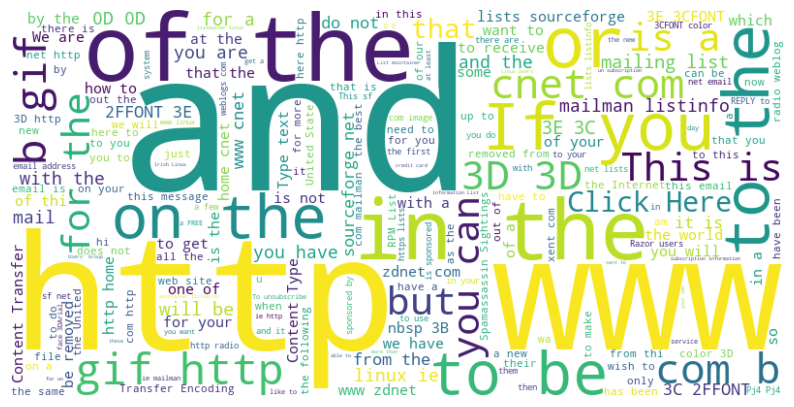

In [38]:
from wordcloud import WordCloud

# Combine all rows into a single string
all_mails = " ".join(df['body'])

# Create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Convert HTML emails to plain text
I observed the WordCloud stopwords consisted of HTML terms

In [39]:
from bs4 import BeautifulSoup

In [40]:
def html_to_plain_text(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

df['body'] = df['body'].apply(html_to_plain_text)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10620\1048675334.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, 'html.parser')


In [41]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Russell Turpin"" <deafbox@hotmail.com>",fork@spamassassin.taint.org,"Wed, 28 Aug 2002 16:26:34 +0000",Re: Canadians,Gary Lawrence Murphy:\n>If we had more variety...,0,1
1,diveintomark <rssfeeds@spamassassin.taint.org>,yyyy@spamassassin.taint.org,"Thu, 26 Sep 2002 15:11:23 -0000",Maps,URL: http://diveintomark.org/archives/2002/09/...,0,1
2,"""Damien Morton"" <damien.morton@acm.org>",<gojomo@usa.net>,"Tue, 13 Aug 2002 00:56:43 -0400",NYTimes.com Article: Bigger Bar Code Inches Up...,How about a highly error corrected atomic leve...,0,1
3,"""Matthew French"" <mfrench42@yahoo.co.uk>","""Declan Houlihan"" <deccy@csn.ul.ie>, <ilug@lin...","Tue, 6 Aug 2002 09:46:27 +0100",[ILUG] Sparc Solaris (was: Dell GX260 V Redhat...,Declan Houlihan mentioned:\n> We're actually i...,0,1
4,"""John P. Looney"" <valen@tuatha.org>",ilug@linux.ie,"Tue, 13 Aug 2002 10:01:17 +0100",Re: [ILUG] SUSE 8 disks? (thread changed sligh...,"On Tue, Aug 13, 2002 at 09:55:49AM +0100, Ryan...",0,1


In [43]:
# additional imports
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [44]:
from nltk.corpus import stopwords

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

df["body"] = df["body"].apply(preprocess_text)
df.head()

,sender,receiver,date,subject,body,label,urls
0,"""Russell Turpin"" <deafbox@hotmail.com>",fork@spamassassin.taint.org,"Wed, 28 Aug 2002 16:26:34 +0000",Re: Canadians,gary lawrence murphy variety franchise food we...,0,1
1,diveintomark <rssfeeds@spamassassin.taint.org>,yyyy@spamassassin.taint.org,"Thu, 26 Sep 2002 15:11:23 -0000",Maps,url date 20020925t1045150500 _mark tosczak_ ne...,0,1
2,"""Damien Morton"" <damien.morton@acm.org>",<gojomo@usa.net>,"Tue, 13 Aug 2002 00:56:43 -0400",NYTimes.com Article: Bigger Bar Code Inches Up...,highly error corrected atomic level 3d encodin...,0,1
3,"""Matthew French"" <mfrench42@yahoo.co.uk>","""Declan Houlihan"" <deccy@csn.ul.ie>, <ilug@lin...","Tue, 6 Aug 2002 09:46:27 +0100",[ILUG] Sparc Solaris (was: Dell GX260 V Redhat...,declan houlihan mentioned actually investigati...,0,1
4,"""John P. Looney"" <valen@tuatha.org>",ilug@linux.ie,"Tue, 13 Aug 2002 10:01:17 +0100",Re: [ILUG] SUSE 8 disks? (thread changed sligh...,tue aug 13 2002 095549am 0100 ryan shane menti...,0,1


# Model Training Validation

In [63]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [67]:
X = df[['body']]
y = df['label']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [78]:
import joblib
vectorizer = joblib.load('vectorizer.joblib')
random_forest_model = joblib.load('random_forest_model.joblib')


X_test_series = X_test['body'].astype(str)
X_test_vectorized = vectorizer.transform(X_test_series)

predictions = random_forest_model.predict(X_test_vectorized)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=1)
recall = recall_score(y_test, predictions, pos_label=1)
f1 = f1_score(y_test, predictions, pos_label=1)
roc_auc = roc_auc_score(y_test, predictions)

print("Evaluation Metrics for Random Forest Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Evaluation Metrics for Random Forest Model:
Accuracy: 0.6663
Precision: 0.8784
Recall: 0.3900
F1-Score: 0.5402
ROC AUC: 0.6677


In [80]:
import joblib
from sklearn.metrics import accuracy_score

vectorizer = joblib.load('vectorizer.joblib')

# Transform the test data
X_test_series = X_test['body'].astype(str)
X_test_vectorized = vectorizer.transform(X_test_series)

# Load models
models = {
    "Random Forest": joblib.load('random_forest_model.joblib'),
    "J48 Decision Tree": joblib.load('j48-decisiontree_model.joblib'),
    "Simple CART": joblib.load('simple-cart_model.joblib'),
    "Random Tree": joblib.load('random-tree_model.joblib'),
    "ADTree": joblib.load('adtree_model.joblib'),
    "REPTree": joblib.load('reptree_model.joblib'),
}

# Evaluate and print accuracy for each model
for name, model in models.items():
    predictions = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {name}: {accuracy:.4f}")

Accuracy for Random Forest: 0.6663
Accuracy for J48 Decision Tree: 0.7095
Accuracy for Simple CART: 0.7106
Accuracy for Random Tree: 0.7106
Accuracy for ADTree: 0.6342
Accuracy for REPTree: 0.7467
